In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

df['Launch date'] = pd.to_datetime(df['Launch date'], format='%d/%m/%Y', errors='coerce')

df['launch_year'] = df['Launch date'].dt.year

features = ['Pieces', 'Year', 'Theme', 'Subtheme', 'retale_price', 'Minifigs', 'years_in_retirement', 'launch_year']
target = 'percentage_increase_per_year_real'  # Change target to adjusted_value_new

print(df[features + [target]].isnull().sum())

df = df[features + [target]].dropna()

print(f"Number of rows after dropping missing values: {len(df)}")

df_encoded = pd.get_dummies(df, columns=['Theme', 'Subtheme'], drop_first=True)

print(f"Shape of the encoded DataFrame: {df_encoded.shape}")

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")
print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")

rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance_RF': rf_importance, 
    'Importance_XGB': xgb_importance
})
print(feature_importance_df.sort_values(by='Importance_RF', ascending=False))


Pieces                               0
Year                                 0
Theme                                0
Subtheme                             0
retale_price                         0
Minifigs                             0
years_in_retirement                  0
launch_year                          0
percentage_increase_per_year_real    0
dtype: int64
Number of rows after dropping missing values: 14980
Shape of the encoded DataFrame: (14980, 428)
Linear Regression - MAE: 3.3014330694909018, RMSE: 6.148248918869527, R²: 0.34289500401507444
Random Forest - MAE: 0.6049898138258397, RMSE: 1.9757309121963347, R²: 0.9321441219384756
XGBoost - MAE: 1.9085730858235916, RMSE: 3.394108343705314, R²: 0.7997450372232623
                      Feature  Importance_RF  Importance_XGB
0                      Pieces   1.909884e-01        0.002744
4         years_in_retirement   1.705432e-01        0.021488
2                retale_price   8.245003e-02        0.005875
14                 Theme_Cit

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

features = ['Theme', 'Subtheme', 'retale_price', 'Pieces', 'Minifigs']  # Selected features
target = 'percentage_increase_per_year_real'  # Target remains the resale price

df_encoded = pd.get_dummies(df[features], columns=['Theme', 'Subtheme'], drop_first=True)

X = df_encoded
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")
print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")

rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance_RF': rf_importance, 
    'Importance_XGB': xgb_importance
})

print(feature_importance_df.sort_values(by='Importance_RF', ascending=False))


Linear Regression - MAE: 3.191526694125947, RMSE: 6.158296729554698, R²: 0.34074549388743125
Random Forest - MAE: 0.6993593380164912, RMSE: 2.0742663364133507, R²: 0.9252070051856591
XGBoost - MAE: 2.3776684140746465, RMSE: 4.046754042087865, R²: 0.7153275078772828
                    Feature  Importance_RF  Importance_XGB
1                    Pieces   3.417589e-01        0.004960
0              retale_price   1.271695e-01        0.003511
2                  Minifigs   9.202902e-02        0.003907
17         Theme_Dimensions   2.616260e-02        0.062618
11               Theme_City   2.342332e-02        0.028833
..                      ...            ...             ...
207      Subtheme_Islanders   1.460033e-07        0.000000
229        Subtheme_Leisure   1.421353e-07        0.000000
278       Subtheme_Paradisa   1.029748e-07        0.000000
223    Subtheme_Lamborghini   9.548297e-08        0.000000
94   Subtheme_Black Falcons   7.216667e-08        0.000000

[424 rows x 3 columns]


In [44]:

theme_columns = [col for col in X.columns if col.startswith('Theme')]
subtheme_columns = [col for col in X.columns if col.startswith('Subtheme')]


theme_and_subtheme_columns = theme_columns + subtheme_columns

theme_importance_df = pd.DataFrame({
    'Theme or Subtheme': theme_and_subtheme_columns,
    'Importance_RF': rf_importance[X.columns.get_loc(theme_and_subtheme_columns[0]):X.columns.get_loc(theme_and_subtheme_columns[-1])+1],
    'Importance_XGB': xgb_importance[X.columns.get_loc(theme_and_subtheme_columns[0]):X.columns.get_loc(theme_and_subtheme_columns[-1])+1]
})

theme_importance_df_sorted = theme_importance_df.sort_values(by='Importance_RF', ascending=False)


print(theme_importance_df_sorted)

          Theme or Subtheme  Importance_RF  Importance_XGB
14         Theme_Dimensions   2.616260e-02        0.062618
8                Theme_City   2.342332e-02        0.028833
47        Theme_Super Mario   2.177703e-02        0.057737
58           Theme_Unikitty   1.875967e-02        0.042092
151  Subtheme_Expansion Set   1.774544e-02        0.000000
..                      ...            ...             ...
204      Subtheme_Islanders   1.460033e-07        0.000000
226        Subtheme_Leisure   1.421353e-07        0.000000
275       Subtheme_Paradisa   1.029748e-07        0.000000
220    Subtheme_Lamborghini   9.548297e-08        0.000000
91   Subtheme_Black Falcons   7.216667e-08        0.000000

[421 rows x 3 columns]


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

features = ['Theme', 'Subtheme', 'retale_price', 'Pieces', 'Minifigs']  # Updated features
target = 'adjusted_value_new'  # Target variable (resale price)

df = df[features + [target]].dropna()  

encoder = OneHotEncoder(sparse=False)
encoded_themes = encoder.fit_transform(df[['Theme', 'Subtheme']])
encoded_df = pd.DataFrame(encoded_themes, columns=encoder.get_feature_names_out(['Theme', 'Subtheme']))

df = pd.concat([df.drop(columns=['Theme', 'Subtheme']), encoded_df], axis=1)

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

predicted_prices = rf_model.predict(X)
df['Predicted_Price'] = predicted_prices

theme_columns = [col for col in df.columns if 'Theme_' in col or 'Subtheme_' in col]
df['Theme_or_Subtheme'] = df[theme_columns].idxmax(axis=1).str.replace('Theme_', '').str.replace('Subtheme_', '')

theme_ranking = df.groupby('Theme_or_Subtheme')['Predicted_Price'].mean().sort_values(ascending=False)
print(theme_ranking.head(10))



/Users/yazeedalmutairi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest - MAE: 2.5917804697627966, RMSE: 10.746433919299166, R²: 0.991110952913018
Theme_or_Subtheme
Creator Expert              427.054793
Trains                      285.953272
Pirates of the Caribbean    217.454453
Western                     211.005790
Pirates                     208.002810
The Lord of the Rings       157.129880
Indiana Jones               139.997600
Spider-Man                  122.569187
Star Wars                   115.362015
Ideas                       113.877559
Name: Predicted_Price, dtype: float64


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

features = ['Theme', 'Subtheme', 'retale_price', 'Pieces', 'Minifigs']  # Include both Theme and Subtheme
target = 'adjusted_value_new'  # Target variable (resale price)

df = df[features + [target]].dropna()

encoder = OneHotEncoder(sparse=False)
encoded_themes_subthemes = encoder.fit_transform(df[['Theme', 'Subtheme']])
encoded_df = pd.DataFrame(encoded_themes_subthemes, columns=encoder.get_feature_names_out(['Theme', 'Subtheme']))

df = pd.concat([df.drop(columns=['Theme', 'Subtheme']), encoded_df], axis=1)

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

predicted_prices = rf_model.predict(X)
df['Predicted_Price'] = predicted_prices

theme_columns = [col for col in df.columns if 'Theme_' in col]
subtheme_columns = [col for col in df.columns if 'Subtheme_' in col]

df['Theme'] = df[theme_columns].idxmax(axis=1).str.replace('Theme_', '')
df['Subtheme'] = df[subtheme_columns].idxmax(axis=1).str.replace('Subtheme_', '')

theme_subtheme_ranking = df.groupby(['Theme', 'Subtheme'])['Predicted_Price'].mean().sort_values(ascending=False)

print("Top 10 Subthemes with Themes by Predicted Resale Price:")
print(theme_subtheme_ranking.head(10))


/Users/yazeedalmutairi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest - MAE: 2.5917804697627966, RMSE: 10.746433919299166, R²: 0.991110952913018
Top 10 Subthemes with Themes by Predicted Resale Price:
Theme                     Subtheme                    
Pirates of the Caribbean  Miscellaneous                   663.596147
Creator Expert            Miscellaneous                   613.972161
                          Modular Buildings Collection    600.836222
                          Fairground                      570.624209
Star Wars                 Ultimate Collector Series       546.736276
                          Master Builder Series           486.715599
Creator Expert            Space                           423.492797
Disney                    Disney Parks                    397.068627
Pirates                   Islanders                       356.727589
Ninjago                   General                         342.683847
Name: Predicted_Price, dtype: float64


MAE: 0.8523658467251088
RMSE: 2.233920685329407
R²: 0.9126682744319967


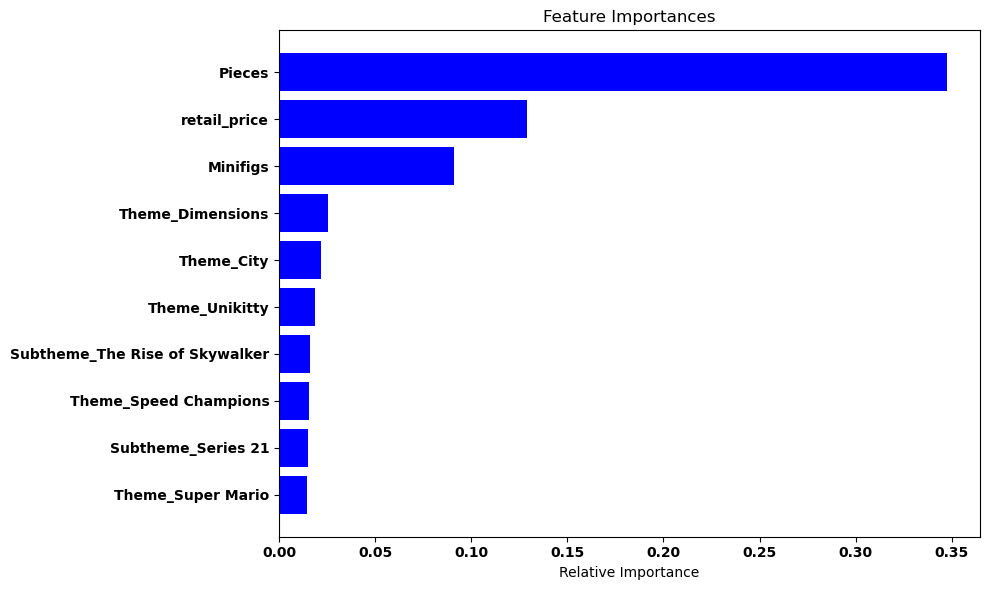

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = '/Users/combined_brickset_testing.csv'
lego_data = pd.read_csv(file_path)
lego_data = lego_data.rename(columns={"retale_price": "retail_price"})
lego_data = pd.get_dummies(lego_data, columns=['Theme', 'Subtheme'], drop_first=True)

X = lego_data[['Pieces', 'retail_price', 'Minifigs'] + 
         list(lego_data.columns[lego_data.columns.str.startswith('Theme_')]) + 
         list(lego_data.columns[lego_data.columns.str.startswith('Subtheme_')])]

y = lego_data['percentage_increase_per_year_real']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


MAE: 1.891774359171463
RMSE: 6.912478896160535
R²: 0.9963221492731166
Top Themes for Investment Based on Predicted Resale Values:
                       Theme  Predicted_Value
13            Creator Expert       423.705554
58                    Trains       288.609639
37  Pirates of the Caribbean       217.607490
60                   Western       210.881321
36                   Pirates       208.461121
54     The Lord of the Rings       155.595657
27             Indiana Jones       145.553525
44                Spider-Man       122.516165
46                 Star Wars       115.244253
26                     Ideas       112.556627


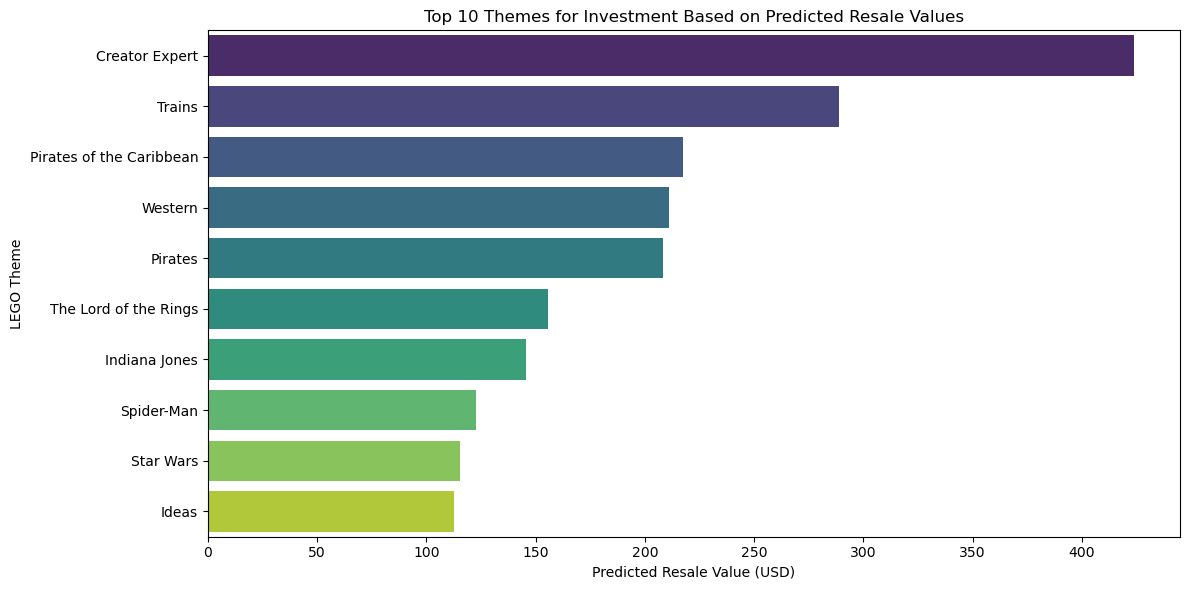

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

df = df.dropna(subset=['adjusted_value_new'])

df = df.drop(columns=['Launch date', 'Exit date'])

themes = df['Theme']

df = pd.get_dummies(df, columns=['Theme', 'Subtheme'], drop_first=True)

features = df.drop(columns=['set_number', 'adjusted_value_new', 'resale_price', 
                            'total_price_increase', 'average_increase_per_year', 
                            'percentage_increase_per_year', 'total_price_increase_real', 
                            'percentage_increase_per_year_real', 'average_increase_per_year_real'])
target = df['adjusted_value_new']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r_squared}')

df['Predicted_Value'] = model.predict(features)

predicted_values_df = pd.DataFrame({
    'Theme': themes,
    'Predicted_Value': df['Predicted_Value']
})

top_themes_investment = predicted_values_df.groupby('Theme')['Predicted_Value'].mean().reset_index()
top_themes_investment = top_themes_investment.sort_values(by='Predicted_Value', ascending=False)

print("Top Themes for Investment Based on Predicted Resale Values:")
print(top_themes_investment.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=top_themes_investment.head(10), x='Predicted_Value', y='Theme', palette='viridis')
plt.title('Top 10 Themes for Investment Based on Predicted Resale Values')
plt.xlabel('Predicted Resale Value (USD)')
plt.ylabel('LEGO Theme')
plt.tight_layout()

plt.show()


Data types after encoding:
Year                                               int64
Pieces                                           float64
Minifigs                                         float64
retale_price                                     float64
years_in_retirement                                int64
                                                  ...   
Theme_Subtheme_Western - Cowboys                   uint8
Theme_Subtheme_Western - Indians                   uint8
Theme_Subtheme_World City - Police and Rescue      uint8
Theme_Subtheme_World City - Special                uint8
Theme_Subtheme_World City - Trains                 uint8
Length: 415, dtype: object
Non-numeric columns:  Index(['Subtheme'], dtype='object')
Checking feature columns for non-numeric data:
Year                                               int64
Pieces                                           float64
Minifigs                                         float64
retale_price                               

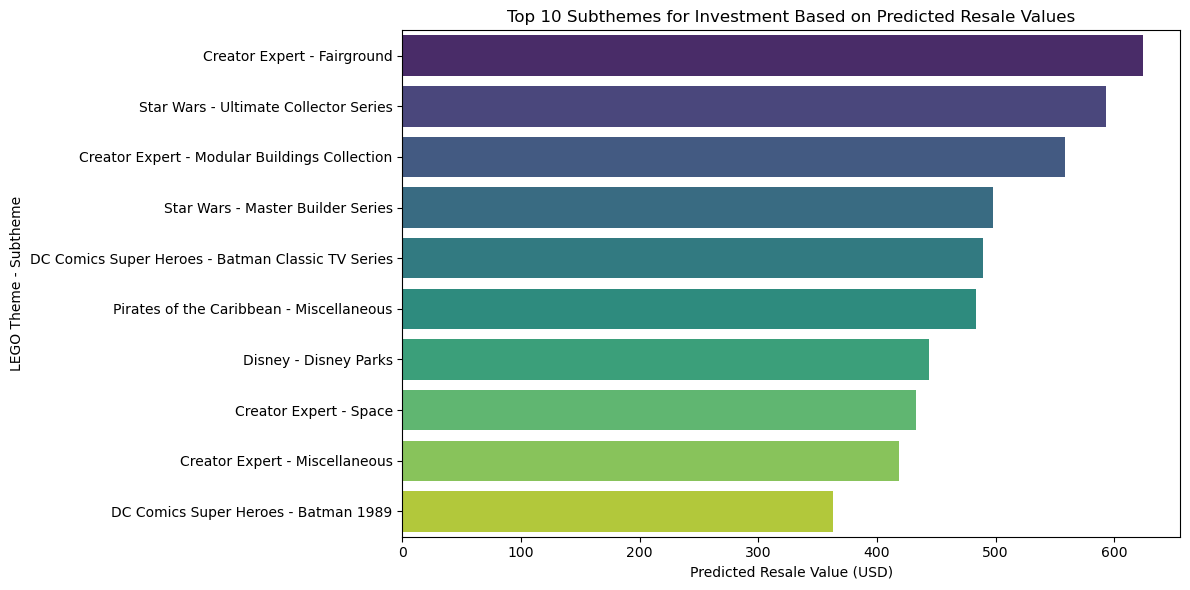

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

df['Theme_Subtheme'] = df['Theme'].astype(str) + ' - ' + df['Subtheme'].astype(str)

df = df.drop(columns=['Launch date', 'Exit date', 'set_number', 'resale_price', 
                      'total_price_increase', 'average_increase_per_year', 
                      'percentage_increase_per_year', 'total_price_increase_real', 
                      'percentage_increase_per_year_real', 'average_increase_per_year_real', 'Theme'])

df = df.dropna(subset=['retale_price', 'Pieces', 'Minifigs', 'adjusted_value_new'])

df_encoded = pd.get_dummies(df, columns=['Theme_Subtheme'], drop_first=True)

print("Data types after encoding:")
print(df_encoded.dtypes)

non_numeric_columns = df_encoded.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns: ", non_numeric_columns)

if len(non_numeric_columns) > 0:
    df_encoded = df_encoded.drop(columns=non_numeric_columns)

X = df_encoded.drop(columns=['adjusted_value_new'])  # Features
y = df_encoded['adjusted_value_new']  # Target

print("Checking feature columns for non-numeric data:")
print(X.dtypes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r_squared}')

df_encoded['Predicted_Value'] = model.predict(X)

predicted_values_df = pd.DataFrame({
    'Theme_Subtheme': df['Theme_Subtheme'],
    'Predicted_Value': df_encoded['Predicted_Value']
})

top_subthemes_investment = predicted_values_df.groupby('Theme_Subtheme')['Predicted_Value'].mean().reset_index()
top_subthemes_investment = top_subthemes_investment.sort_values(by='Predicted_Value', ascending=False)

print("Top Subthemes for Investment Based on Predicted Resale Values:")
print(top_subthemes_investment.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=top_subthemes_investment.head(10), x='Predicted_Value', y='Theme_Subtheme', palette='viridis')
plt.title('Top 10 Subthemes for Investment Based on Predicted Resale Values')
plt.xlabel('Predicted Resale Value (USD)')
plt.ylabel('LEGO Theme - Subtheme')
plt.tight_layout()
plt.show()


MAE: 0.07552209934805837
RMSE: 0.4084082013254791
R²: 0.9973137147439808


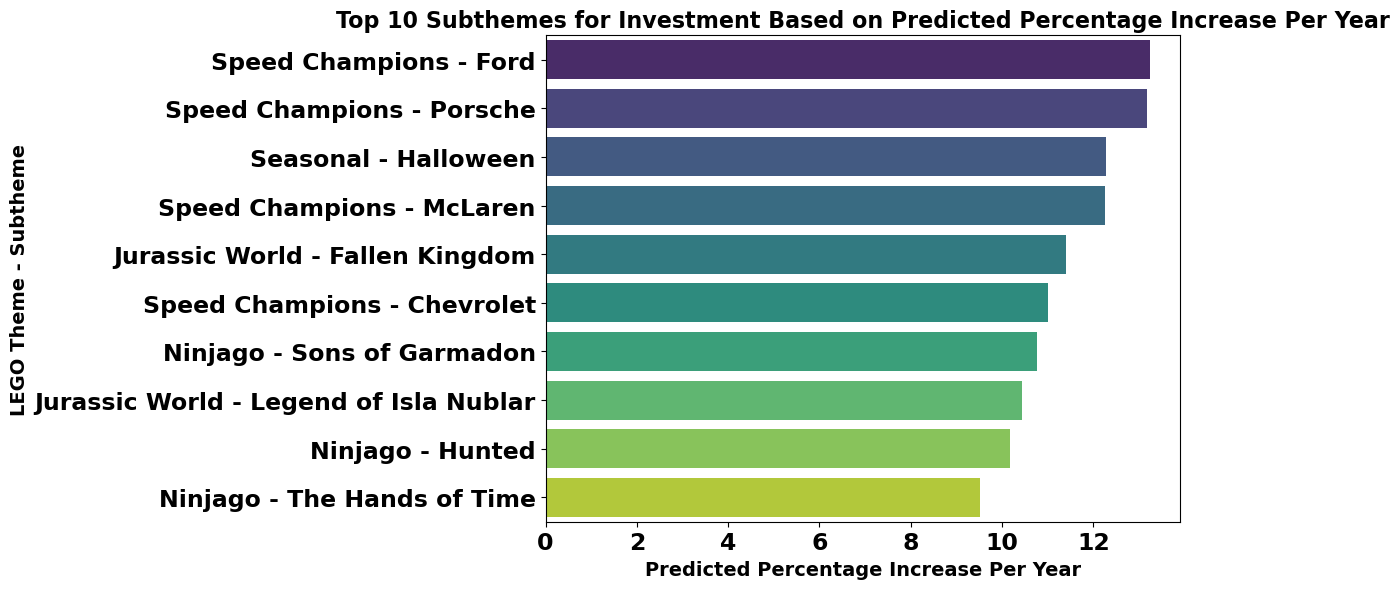

In [58]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

df['Theme_Subtheme'] = df['Theme'].astype(str) + ' - ' + df['Subtheme'].astype(str)

df = df.drop(columns=['Launch date', 'Exit date', 'set_number', 'resale_price', 
                      'total_price_increase', 'average_increase_per_year', 
                      'percentage_increase_per_year', 'total_price_increase_real', 
                      'average_increase_per_year_real'])  

df = df.dropna(subset=['retale_price', 'Pieces', 'Minifigs', 'percentage_increase_per_year_real'])

subtheme_counts = df['Theme_Subtheme'].value_counts()
valid_subthemes = subtheme_counts[subtheme_counts > 10].index
df_filtered = df[df['Theme_Subtheme'].isin(valid_subthemes)]

df_encoded = pd.get_dummies(df_filtered, columns=['Theme_Subtheme'], drop_first=True)

non_numeric_columns = df_encoded.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    df_encoded = df_encoded.drop(columns=non_numeric_columns)

X = df_encoded.drop(columns=['percentage_increase_per_year_real'])  # Features
y = df_encoded['percentage_increase_per_year_real']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r_squared}')

df_encoded['Predicted_Value'] = model.predict(X)

predicted_values_df = pd.DataFrame({
    'Theme_Subtheme': df_filtered['Theme_Subtheme'],
    'Predicted_Value': df_encoded['Predicted_Value']
})

top_subthemes_investment = predicted_values_df.groupby('Theme_Subtheme')['Predicted_Value'].mean().reset_index()
top_subthemes_investment = top_subthemes_investment.sort_values(by='Predicted_Value', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_subthemes_investment.head(10), x='Predicted_Value', y='Theme_Subtheme', palette='viridis')
plt.title('Top 10 Subthemes for Investment Based on Predicted Percentage Increase Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Percentage Increase Per Year', fontsize=14, fontweight='bold')
plt.ylabel('LEGO Theme - Subtheme', fontsize=14, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')
plt.tight_layout()
plt.show()


MAE: 0.07509624344199124
RMSE: 0.2760516479440587
R²: 0.9986753151387223


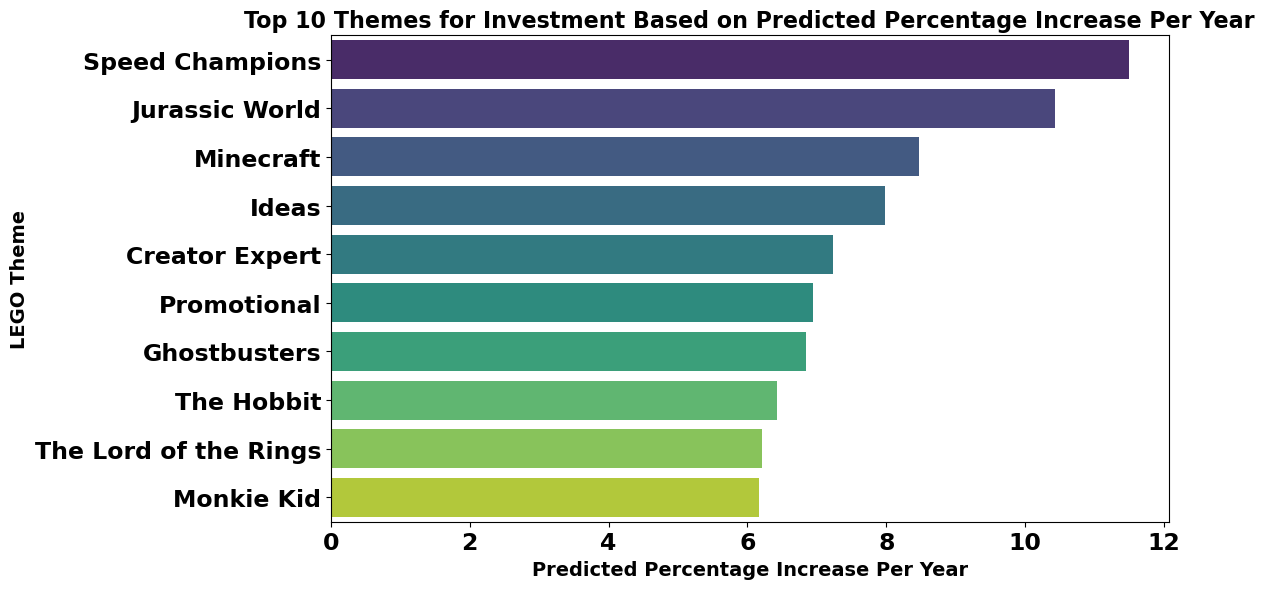

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/combined_brickset_testing.csv'
df = pd.read_csv(file_path)

df = df.drop(columns=['Launch date', 'Exit date', 'set_number', 'resale_price', 
                      'total_price_increase', 'average_increase_per_year', 
                      'percentage_increase_per_year', 'total_price_increase_real', 
                      'average_increase_per_year_real', 'Subtheme'])  

df = df.dropna(subset=['retale_price', 'Pieces', 'Minifigs', 'percentage_increase_per_year_real'])

df_encoded = pd.get_dummies(df, columns=['Theme'], drop_first=True)

non_numeric_columns = df_encoded.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    df_encoded = df_encoded.drop(columns=non_numeric_columns)

X = df_encoded.drop(columns=['percentage_increase_per_year_real'])  # Features
y = df_encoded['percentage_increase_per_year_real']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r_squared}')

df_encoded['Predicted_Value'] = model.predict(X)

predicted_values_df = pd.DataFrame({
    'Theme': df['Theme'],
    'Predicted_Value': df_encoded['Predicted_Value']
})

top_themes_investment = predicted_values_df.groupby('Theme')['Predicted_Value'].mean().reset_index()
top_themes_investment = top_themes_investment.sort_values(by='Predicted_Value', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_themes_investment.head(10), x='Predicted_Value', y='Theme', palette='viridis')
plt.title('Top 10 Themes for Investment Based on Predicted Percentage Increase Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Percentage Increase Per Year', fontsize=14, fontweight='bold')
plt.ylabel('LEGO Theme', fontsize=14, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')
plt.tight_layout()
plt.show()


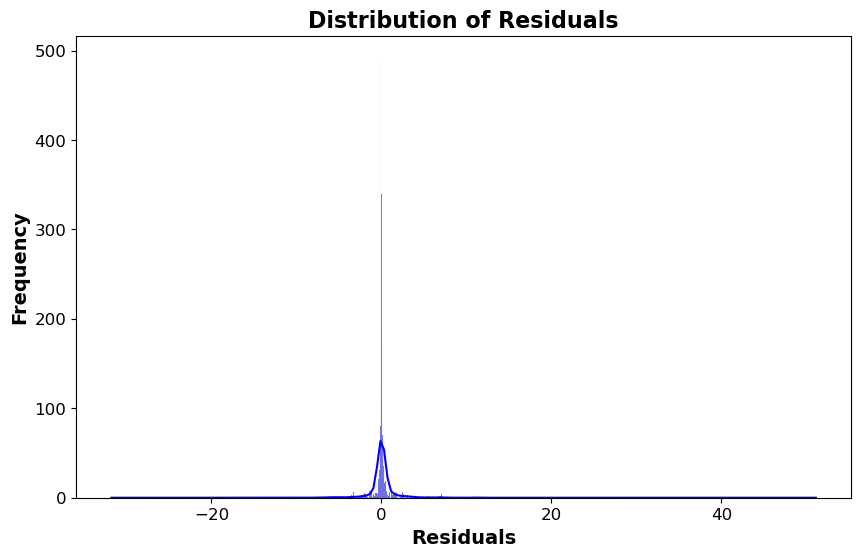

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


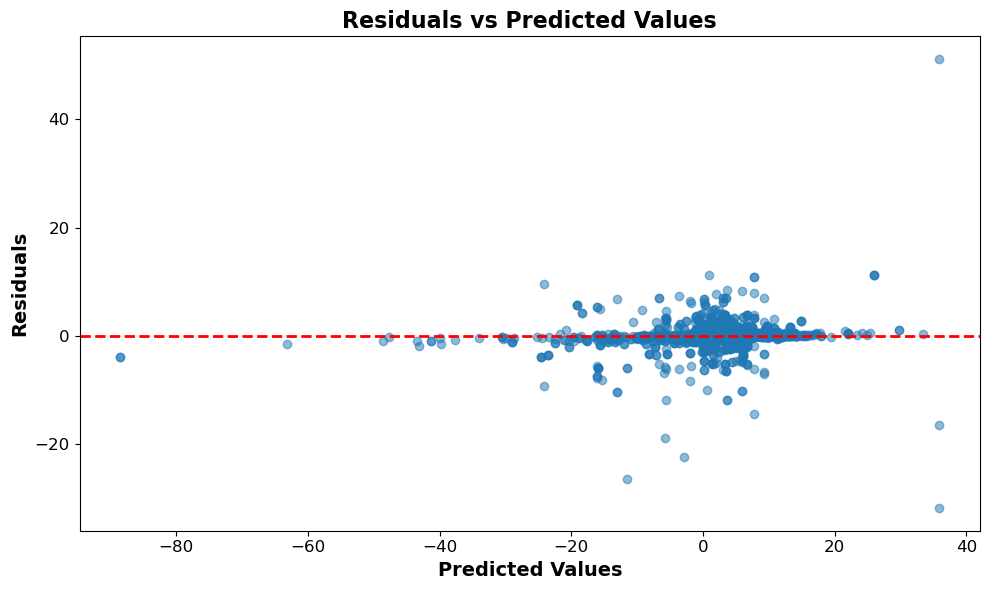

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


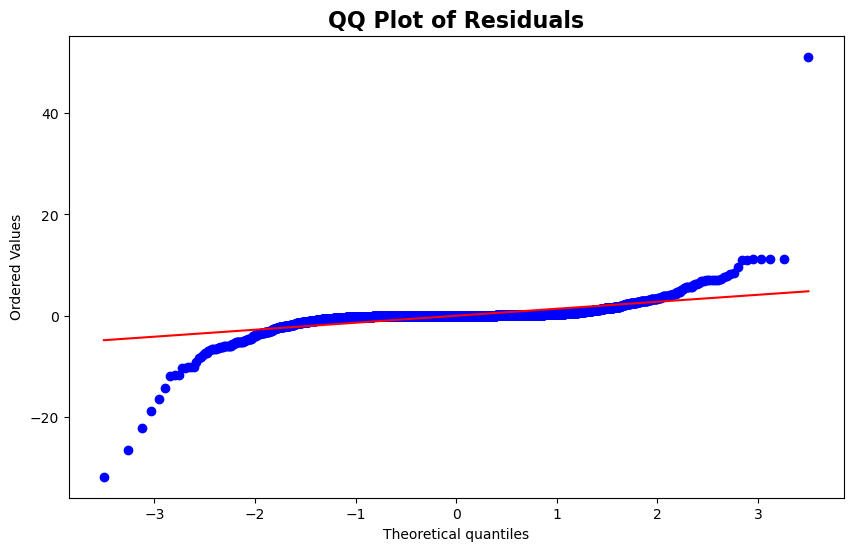

In [92]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals', fontsize=16, fontweight='bold')
plt.show()


In [93]:
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
print(f"Mean of Residuals: {mean_residuals}")
print(f"Standard Deviation of Residuals: {std_residuals}")


Mean of Residuals: -0.0007392797489796109
Standard Deviation of Residuals: 2.0677681685731253
